> # Module Data Mining 

<img src="https://www.promptcloud.com/wp-content/uploads/2020/02/Data-Mining.png" title="Python Logo"/>

<dl>
<dt>Nom et Prénom :</dt>
<dd>LAMHOUR Mohamd Akram</dd>
<dd>MSALEK Mohamed</dd>
<dt>Tp : 2 </dt>
</dl> 

## Description


1. id : ID unique 
2. Gender : Le genre des voyageurs  (Femme, Homme) 
3. Customer Type : Le type de client (Client fidèle, Client déloyal) 
4. Age : âge réel des voyageurs
5. Type of Travel : Le motif du vol des voyageurs (Voyage personnel, Voyage d'affaires) 
6. Class : classe de voyage dans l'avion des passagers (Business, Eco, Eco Plus).
7. Flight distance : la distance de vol de ce voyage.
8. Inflight wifi service : Niveau de satisfaction du service wifi à bord (0 : non applicable ; 1 : 5)
9. Departure/Arrival time convenient : Niveau de satisfaction concernant l'heure de départ/arrivée pratique
10. Ease of Online booking : Niveau de satisfaction concernant la réservation en ligne
11. Gate location : Niveau de satisfaction concernant le portail 
12. Food and drink :Niveau de satisfaction à propos du service de restauration.
13. Online boarding : Niveau de satisfaction à l'égard de la réservation en ligne
14. Seat comfort : niveau de satisfaction par rapport au confort des sièges
15. Inflight entertainment : Niveau de satisfaction du service de divertissement à bord
16. On-board service : Niveau de satisfaction du service à bord
17. Leg room service : Niveau de satisfaction à propos du service aux bagages
18. Baggage handling :  Niveau de satisfaction du traitement des bagages
19. Check-in service : Niveau de satisfaction du service Check-in
20. Inflight service :  Niveau de satisfaction du service en vol
21. Cleanliness : Niveau de satisfaction à propos de la propreté.
22. Departure Delay in Minutes : Retard en minutes au moment du départ
23. Arrival Delay in Minutes : Retard à l'arrivée (minutes)
24. satisfaction : Satisfaction de la compagnie aérienne (Satisfaction, neutre ou insatisfaction)

# Importation des bibliothèques

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# DataFrame Overview

In [18]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data = pd.concat([train, test])
data.to_csv("Airline_Dataset.csv")

In [19]:
df =pd.read_csv(r'Airline_Dataset.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [20]:
df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1, inplace=True)

In [21]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [22]:
df.to_csv("Airline_Dataset.csv")
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [24]:
# Pour faciliter la récupération des colonnes
df.columns=[each.replace(" ","_") for each in df.columns]
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [25]:
df.describe()

,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# **Data Cleaning**

### Filtrage des données qui ont des valeurs complexes

In [26]:
#Vérification de la somme des données nulles de chaque colonne
(df==0).sum()

id                                       0
Gender                                   0
Customer_Type                            0
Age                                      0
Type_of_Travel                           0
Class                                    0
Flight_Distance                          0
Inflight_wifi_service                 3916
Departure/Arrival_time_convenient     6681
Ease_of_Online_booking                5682
Gate_location                            1
Food_and_drink                         132
Online_boarding                       3080
Seat_comfort                             1
Inflight_entertainment                  18
On-board_service                         5
Leg_room_service                       598
Baggage_handling                         0
Checkin_service                          1
Inflight_service                         5
Cleanliness                             14
Departure_Delay_in_Minutes           73356
Arrival_Delay_in_Minutes             72753
satisfactio

In [27]:
df_zero= df[((df['Inflight_wifi_service']!=0)&(df['Departure/Arrival_time_convenient']!=0)&(df['Ease_of_Online_booking']!=0)
             &(df['Gate_location']!=0)&(df['Food_and_drink']!=0)&(df['Online_boarding']!=0)&(df['Seat_comfort']!=0)&(df['Inflight_entertainment']!=0)
             &(df['On-board_service']!=0)&(df['Leg_room_service']!=0)&(df['Baggage_handling']!=0)&(df['Checkin_service']!=0)&(df['Inflight_service']!=0)&(df['Cleanliness']!=0))]

print(df_zero.shape)

(119567, 24)


### Traitement des valeurs manquantes

In [28]:
#Nombre de données nulles sur Arrival_Delay_in_Minutes.
print(df_zero.isnull().sum())
df_clean = df_zero.dropna(axis=0) #supprimer les données de chaque ligne contenant une valeur nulle
df_clean.info()

id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             363
satisfaction                           0
dtype: int64
<cl

In [29]:
df_clean.isnull().sum()

id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

### Traitement des valeurs aberrantes

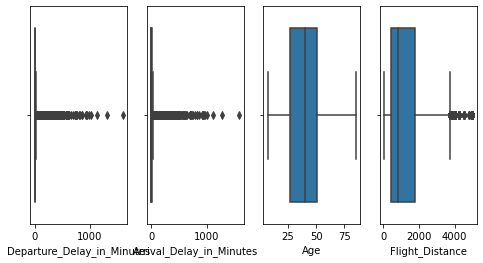

In [30]:
list_column = ['Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes','Age','Flight_Distance']

plt.figure(figsize=(8,4))
for i in range (len(list_column)):
  plt.subplot(1,4,i+1)
  sns.boxplot(x=df[list_column[i]])

### Traitement des valeurs dupliquées

In [31]:
#Aucune des valeurs dupliquées
df_clean.duplicated().sum()

0

### Formatting DataFrame

In [32]:
#Convertir la valeur de la satisfaction en 1 ou 0
df_clean['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})
df_clean.reset_index(drop=True).head()

C:\Users\PC\AppData\Local\Temp/ipykernel_16220/1634522878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})


,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [33]:
# Renommer la valeur du Dataframe
df_clean['Customer_Type']=df_clean['Customer_Type'].map({'Loyal Customer':'Loyal','disloyal Customer':'Disloyal'})
df_clean['Type_of_Travel']=df_clean['Type_of_Travel'].map({'Personal Travel':'Personal','Business travel':'Business'})
df_clean['Class']=df_clean['Class'].map({'Eco Plus':'Economic','Eco':'Economic','Business':'Business'})
df_clean.head()

C:\Users\PC\AppData\Local\Temp/ipykernel_16220/403418988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Customer_Type']=df_clean['Customer_Type'].map({'Loyal Customer':'Loyal','disloyal Customer':'Disloyal'})
C:\Users\PC\AppData\Local\Temp/ipykernel_16220/403418988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Type_of_Travel']=df_clean['Type_of_Travel'].map({'Personal Travel':'Personal','Business travel':'Business'})
C:\Users\PC\AppData\Local\Temp/ipykernel_16220/403418988.py:

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal,13,Personal,Economic,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,Disloyal,25,Business,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal,26,Business,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal,25,Business,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal,61,Business,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


# **EDA** (Analyse exploratoire des données)

In [34]:
DF= df_clean.copy()

#la colonne delay time reflète les mêmes informations, dont les dimensions très réduites, elle doit être assemblée.
DF['Total_Delay_Times'] = DF['Departure_Delay_in_Minutes'] + DF['Arrival_Delay_in_Minutes']
DF= DF.drop(columns=DF[['Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes']])
DF.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction,Total_Delay_Times
0,70172,Male,Loyal,13,Personal,Economic,460,3,4,3,...,5,5,4,3,4,4,5,5,0,43.0
1,5047,Male,Disloyal,25,Business,Business,235,3,2,3,...,1,1,1,5,3,1,4,1,0,7.0
2,110028,Female,Loyal,26,Business,Business,1142,2,2,2,...,5,5,4,3,4,4,4,5,1,0.0
3,24026,Female,Loyal,25,Business,Business,562,2,5,5,...,2,2,2,5,3,1,4,2,0,20.0
4,119299,Male,Loyal,61,Business,Business,214,3,3,3,...,5,3,3,4,4,3,3,3,1,0.0


## **Le pourcentage de clients satisfaits et insatisfaits.**

C:\Users\PC\AppData\Local\Temp/ipykernel_16220/728292012.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_box" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Satisfation.png', tight_box=True)


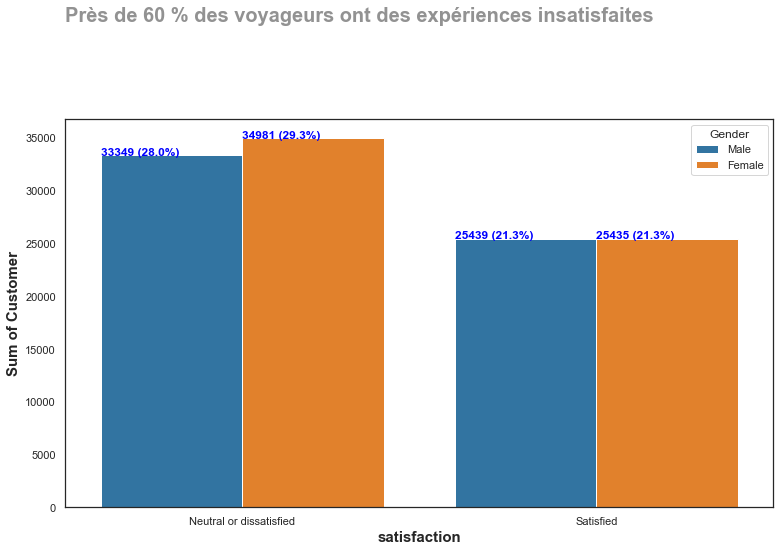

In [35]:
plt.figure(figsize=(11,8))
sns.set(style='white')
a= sns.countplot(x='satisfaction',data=DF,palette='tab10',hue='Gender')
a.set_xticklabels(['Neutral or dissatisfied','Satisfied'])
a.text(x = -0.5, y = 46000, s = "Près de 60 % des voyageurs ont des expériences insatisfaites",fontsize = 20, weight = 'bold', alpha = .50)
a.text(x = -0.5, y = 38000, 
        s = '',
              fontsize = 16, alpha = .50)

for i in a.patches:
  a.annotate(str(i.get_height())+ ' ('+str((i.get_height()/len(DF)*100).round(1)) + '%)',(i.get_x(), i.get_height()),weight='bold',color='blue')
plt.xlabel('satisfaction',weight='bold',fontsize=15)
plt.ylabel('Sum of Customer',weight='bold',fontsize=15)
plt.tight_layout()
plt.savefig('Satisfation.png', tight_box=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PC\AppData\Local\Temp/ipykernel_16220/116886867.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_box" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('TypeCustomer.png', tight_box=True)


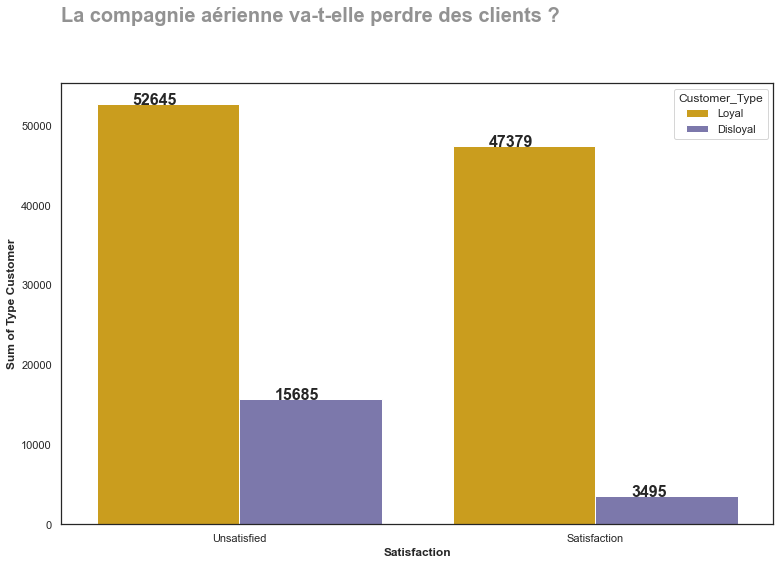

In [36]:
plt.figure(figsize=(11,8))
sns.set(style='white')
b=sns.countplot('satisfaction',data=DF,hue='Customer_Type',palette='Dark2_r')
b.set_xticklabels(['Unsatisfied','Satisfaction'])
b.text(x = -0.5, y = 63000, s = "La compagnie aérienne va-t-elle perdre des clients ?",fontsize = 20, weight = 'bold', alpha = .50)
b.text(x = -0.5, y = 56000, 
        s = '',
              fontsize = 16, alpha = .50)

for i in b.patches:
  b.annotate(str(i.get_height()),(i.get_x()+0.1,i.get_height()),weight='bold',fontsize=16)

plt.xlabel('Satisfaction',weight='bold')
plt.ylabel('Sum of Type Customer',weight='bold')
plt.tight_layout()
plt.savefig('TypeCustomer.png', tight_box=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PC\AppData\Local\Temp/ipykernel_16220/2022630812.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_box" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('TypeTravel.png', tight_box=True)


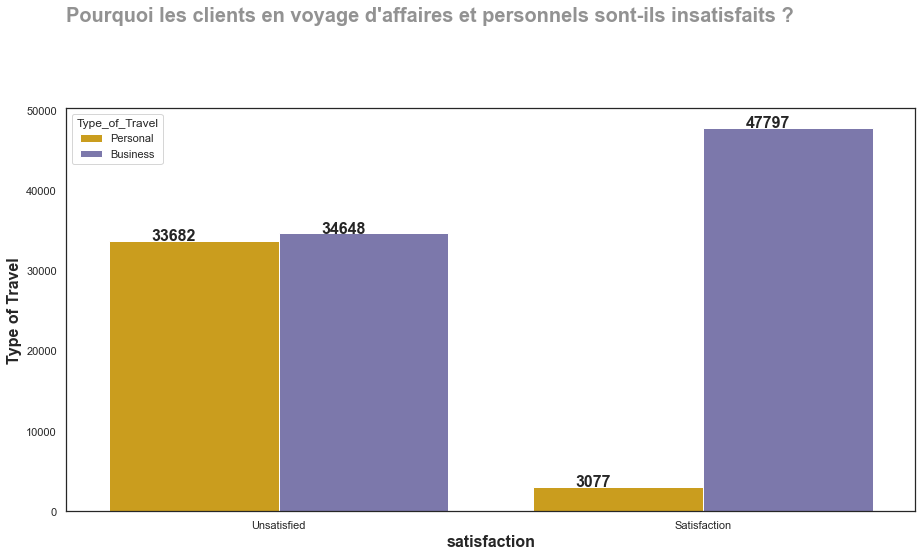

In [37]:
plt.figure(figsize=(13,8))
sns.set(style='white')
b=sns.countplot('satisfaction',data=DF,hue='Type_of_Travel',palette='Dark2_r')
b.set_xticklabels(['Unsatisfied','Satisfaction'])
b.text(x = -0.5, y = 61000, s = "Pourquoi les clients en voyage d'affaires et personnels sont-ils insatisfaits ?",fontsize = 20, weight = 'bold', alpha = .50)
b.text(x = -0.5, y = 51000, 
        s = '',
              fontsize = 16, alpha = .50)

for i in b.patches:
  b.annotate(str(i.get_height()),(i.get_x()+0.1,i.get_height()),weight='bold',fontsize=16)

plt.xlabel('satisfaction',weight='bold',fontsize=16)
plt.ylabel('Type of Travel',weight='bold',fontsize=16)
plt.tight_layout()
plt.savefig('TypeTravel.png', tight_box=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\PC\AppData\Local\Temp/ipykernel_8456/2754802190.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_box" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Corr_Categorial.png', tight_box=True)


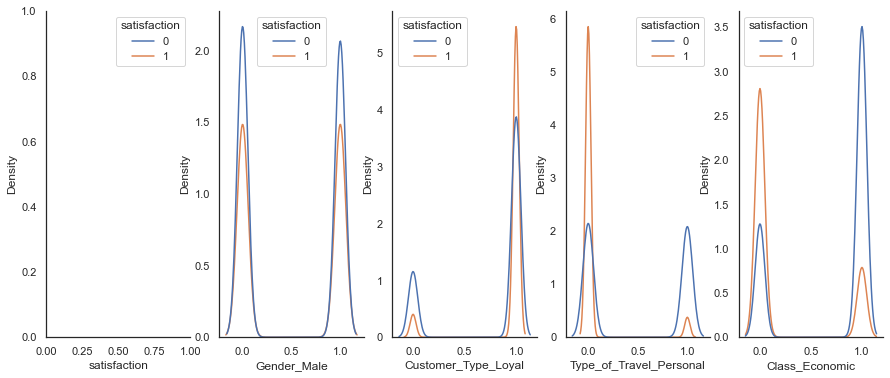

In [38]:
##Corr_Categorial
cat =DF[['Gender','Customer_Type','Type_of_Travel','Class','satisfaction']]
categorial = pd.get_dummies(cat,drop_first=True)
categorial

fig = plt.figure(figsize=(15,6))
sns.set(style='white')
for i in range (5):
    fig.add_subplot(1,5,i+1)
    sns.kdeplot(data=categorial,x=categorial.columns[i],hue='satisfaction')
    sns.despine()

plt.savefig('Corr_Categorial.png', tight_box=True)

C:\Users\PC\AppData\Local\Temp/ipykernel_8456/887092593.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_box" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Correlation_each_feature.png', tight_box=True)


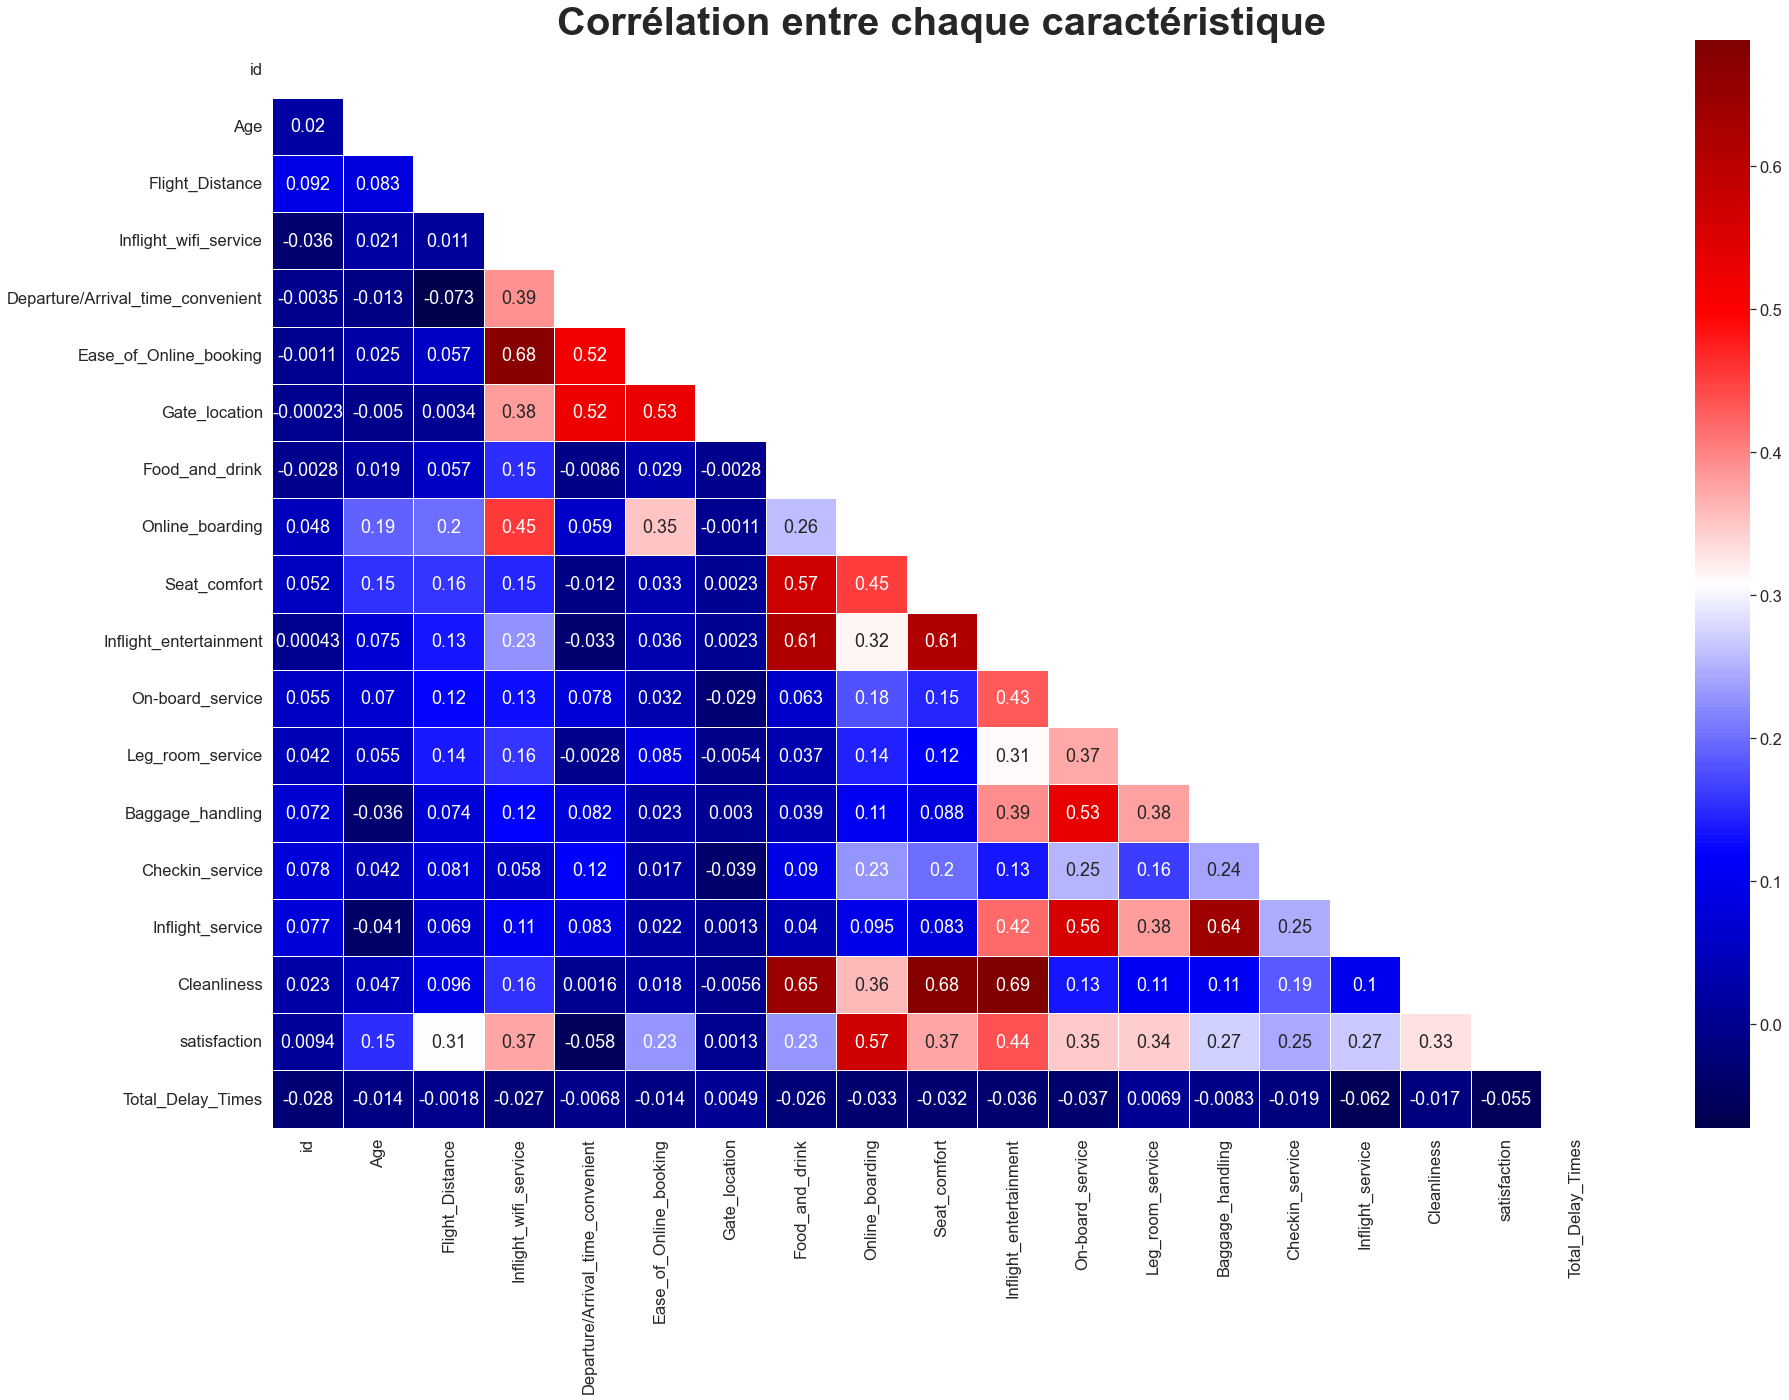

In [40]:
sns.set(style='white',font_scale=(1.5))
plt.figure(figsize=(30,20))

#mask pour supprimer les données en double.
mask = np.triu(np.ones_like(DF.corr(), dtype=bool))

sns.heatmap(DF.corr(),annot=True,linewidths=0.5,linecolor='white',cmap='seismic',mask=mask)
plt.title('Corrélation entre chaque caractéristique',weight='bold',fontsize=40)
plt.savefig('Correlation_each_feature.png', tight_box=True)

**(Online Boarding) a une forte corrélation avec le niveau de satisfaction. Lors de l'analyse des résultats de la corrélation, les points suivants doivent être pris en compte :**

1. Corrélation avec la satisfaction cible :

(Online Boarding) a une forte corrélation avec le niveau de satisfaction. De plus, il existe plusieurs fonctionnalités qui ont une faible corrélation ou qui n'ont pas de corrélation avec la cible, de sorte que ces fonctionnalités ont le potentiel d'être supprimées.

2. Corrélation avec d'autres fonctionnalités :

certaines fonctionnalités ont une forte corrélation avec d'autres fonctionnalités, cela a le potentiel de devenir une fonctionnalité redondante.
Ces fonctionnalités sont :

-(inflight entertainment) et (inflight service)

-(seat control) et (inflight service)

-(inflight service) et (baggage handling)

-(gate location) et (deperture/arrival time convenient)

-(easy online booking) et (gate location)

Mais pour le point 2, en anticipant uniquement les dimensions, il faut une petite astuce ou une compréhension commerciale pour décider de supprimer l'une des caractéristiques de celle avec une corrélation élevée.

# **Feature Engineering**


In [41]:
DF=DF.drop(columns=['id','Age','Gender','Gate_location','Departure/Arrival_time_convenient','Total_Delay_Times'],axis=1)
DF.sample(10)

,Customer_Type,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction
44563,Loyal,Business,Business,2954,2,2,5,5,4,4,4,4,4,5,4,3,1
67085,Loyal,Business,Business,3601,1,1,3,5,4,4,4,4,4,5,4,3,1
55922,Loyal,Personal,Economic,862,1,1,1,1,1,1,5,4,4,2,1,1,0
94492,Loyal,Business,Business,2869,1,1,4,4,4,4,4,4,1,4,4,4,1
60422,Loyal,Business,Economic,946,4,4,4,4,4,4,4,5,2,3,5,4,1
101537,Loyal,Business,Business,122,1,3,2,3,4,4,4,4,1,4,4,3,0
49364,Disloyal,Business,Economic,977,2,2,5,2,5,5,1,5,5,5,2,5,0
79109,Loyal,Personal,Economic,1747,4,4,4,4,4,4,2,1,3,3,4,4,0
104300,Disloyal,Business,Business,414,3,3,1,3,1,1,5,4,5,4,5,1,0
8957,Loyal,Business,Business,3477,3,4,5,5,5,5,3,5,2,4,3,5,1


In [42]:
#On va remplacer les données catégorielles par 0 et 1 numériques, cela signifie que les données catégorielles sont composées de deux catégories.
df1=pd.get_dummies(DF,drop_first=True)
df1.head()

,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction,Customer_Type_Loyal,Type_of_Travel_Personal,Class_Economic
0,460,3,3,5,3,5,5,4,3,4,4,5,5,0,1,1,1
1,235,3,3,1,3,1,1,1,5,3,1,4,1,0,0,0,0
2,1142,2,2,5,5,5,5,4,3,4,4,4,5,1,1,0,0
3,562,2,5,2,2,2,2,2,5,3,1,4,2,0,1,0,0
4,214,3,3,4,5,5,3,3,4,4,3,3,3,1,1,0,0


# **Modeling and Evaluation**

In [43]:
#dataset utilisé ne contient pas la cible
X=df1.drop(['satisfaction'],axis=1)
#En tant que cible de modélisation
y= df1['satisfaction']

In [44]:
print(X.shape)
y.shape

(119204, 16)


(119204,)

In [45]:
#Avant de faire la modélisation, on va normaliser toutes les valeurs existantes pour éviter les erreurs de calcul
from sklearn.preprocessing import StandardScaler
ds=StandardScaler()
ds.fit(X.values)
X_tr = ds.transform(X.values)

In [46]:
X_tr

array([[-0.76391672,  0.14541167,  0.09314917, ...,  0.43789722,
         1.49761547,  0.97334266],
       [-0.98895349,  0.14541167,  0.09314917, ..., -2.28364087,
        -0.66772815, -1.02738741],
       [-0.08180528, -0.65245499, -0.67687539, ...,  0.43789722,
        -0.66772815, -1.02738741],
       ...,
       [-0.39585659, -0.65245499, -1.44689996, ...,  0.43789722,
         1.49761547,  0.97334266],
       [-0.09680774,  0.14541167,  0.09314917, ...,  0.43789722,
        -0.66772815, -1.02738741],
       [-0.95994875, -0.65245499, -0.67687539, ...,  0.43789722,
         1.49761547,  0.97334266]])

In [47]:
#Distribution de 80 % de données de train et de 20 % de données de test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)

In [48]:
print(X_train.shape,y_train.shape)

(95363, 16) (95363,)


In [49]:
print(X_test.shape,y_test.shape)

(23841, 16) (23841,)


In [50]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve

def run_model(model, X_train, y_train, X_test, y_test, verbose=True,):
    t0=time.time()    
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0   #Durée du processus
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

### LogisticRegression

Accuracy = 0.8955161276792081
ROC Area under Curve = 0.8929903146655627
Time taken = 5.045748472213745
              precision    recall  f1-score   support

           0    0.90723   0.91049   0.90886     13641
           1    0.87972   0.87549   0.87760     10200

    accuracy                        0.89552     23841
   macro avg    0.89347   0.89299   0.89323     23841
weighted avg    0.89546   0.89552   0.89548     23841



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


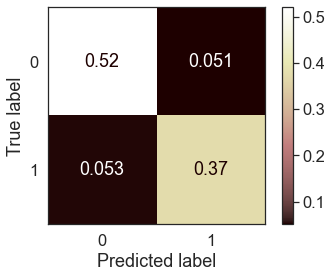

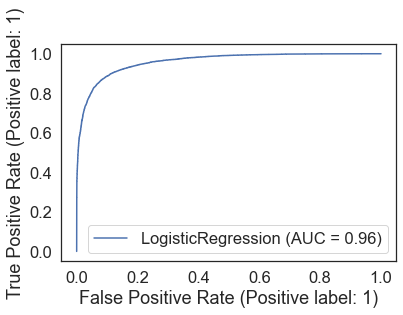

In [51]:
# LogisticRegression
model_lr = LogisticRegression(max_iter=1000)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

### KNeighborsClassifier

Accuracy = 0.865399941277631
ROC Area under Curve = 0.8546410583146828
Time taken = 2.4059135913848877
              precision    recall  f1-score   support

           0    0.84964   0.92918   0.88764     13641
           1    0.89174   0.78010   0.83219     10200

    accuracy                        0.86540     23841
   macro avg    0.87069   0.85464   0.85991     23841
weighted avg    0.86765   0.86540   0.86392     23841



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


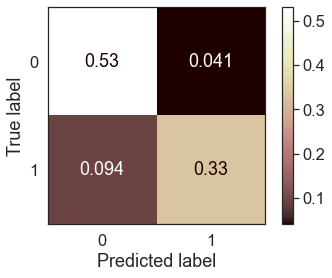

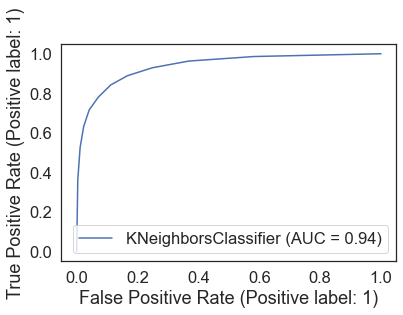

In [52]:
params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

### DecisionTree

Accuracy = 0.9351537267732059
ROC Area under Curve = 0.9321913716003226
Time taken = 0.17058777809143066
              precision    recall  f1-score   support

           0    0.93517   0.95272   0.94386     13641
           1    0.93514   0.91167   0.92325     10200

    accuracy                        0.93515     23841
   macro avg    0.93515   0.93219   0.93356     23841
weighted avg    0.93515   0.93515   0.93504     23841



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


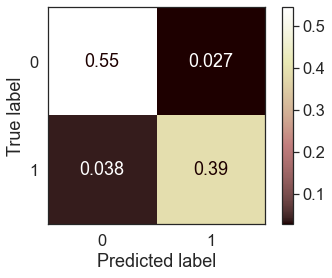

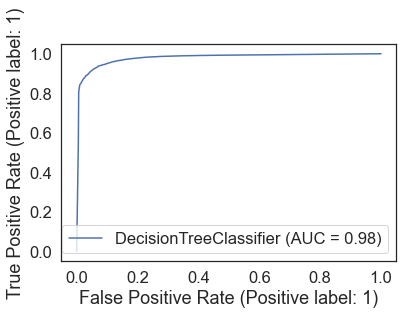

In [53]:
#DecisionTree
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

### RandomForest

Accuracy = 0.962040182878235
ROC Area under Curve = 0.9590130100863745
Time taken = 10.172786235809326
              precision    recall  f1-score   support

           0    0.95486   0.97999   0.96726     13641
           1    0.97226   0.93804   0.95484     10200

    accuracy                        0.96204     23841
   macro avg    0.96356   0.95901   0.96105     23841
weighted avg    0.96230   0.96204   0.96195     23841



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


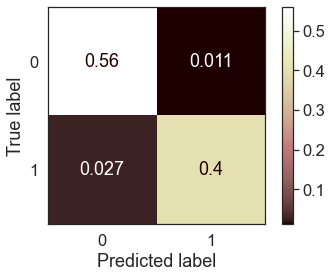

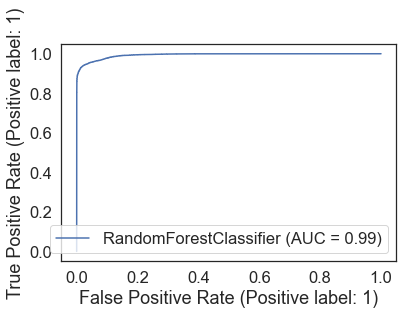

In [54]:
#RandomForest
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

**Conclusion :**

RandomForest est très bon à utiliser car il a de bons résultats d'évaluation.
Après avoir fait des prédictions sur les données de test avec un total de 20 % de l'ensemble de données. Où les résultats d'évaluation montrent les valeurs de AUC(0.959),recall(0.97),accuration(0.96) et precision(0.95) avec un temps de prédiction de 9.49 s.

Sur la base des caractéristiques trouvées, les compagnies aériennes devraient se concentrer davantage sur les deux choses qui ont le plus d'influence sur les prévisions, à savoir **Onlin boarding et Flight Wifi Service**.